# Best Times to Tweets in Healthcare vs. Education

### Read in the csv file

In [1]:
import pandas as pd
df = pd.read_csv(r"E:\OneDrive - University of Georgia\Project\Data\tweet_data_3_groccery\4.3 FourColumns 3+1csv - Copy\grocerry_2021.csv",low_memory=False)
#df

### Convert the "Created At" field into a datetime data type, extract the day of the week, and map it onto a new column called "weekdays"

In [2]:
import datetime

df1 = df.copy()

df1['local_time'] = pd.to_datetime(df1['local_time'])
value = df1['local_time']
        
def weekday(date):
    if date.weekday() == 0:
        return 'Monday'
    elif date.weekday() == 1:
        return 'Tuesday'
    elif date.weekday() == 2:
        return 'Wednesday'
    elif date.weekday() == 3:
        return 'Thursday'
    elif date.weekday() == 4:
        return 'Friday'
    elif date.weekday() == 5:
        return 'Saturday'
    else:
        return 'Sunday'

df1["weekdays"] = value.map(weekday)
df1['weekdays']

0         Wednesday
1         Wednesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
129985    Wednesday
129986    Wednesday
129987    Wednesday
129988    Wednesday
129989    Wednesday
Name: weekdays, Length: 129990, dtype: object

### Extract the time and map it onto a new column called "time"

In [3]:
df2 = df1.copy()

def time(date):
    time2 = date.time()
    return time2

df2["time"] = value.map(time)
df2['time']

0         15:59:25
1         17:59:18
2         17:57:42
3         17:56:19
4         18:52:00
            ...   
129985    18:10:31
129986    16:10:11
129987    19:09:36
129988    19:06:08
129989    19:00:18
Name: time, Length: 129990, dtype: object

### Group the times into hourly buckets and map it onto a new column called "time groups"

In [4]:
df3 = df2.copy()

def time_groups(time):
    if time >= datetime.time(0,0) and time <= datetime.time(1,0):
        return '12AM-1AM'
    elif time >= datetime.time(1,0) and time <= datetime.time(2,0):
        return '1AM-2AM'
    elif time >= datetime.time(2,0) and time <= datetime.time(3,0):
        return '2AM-3AM'
    elif time >= datetime.time(3,0) and time <= datetime.time(4,0):
        return '3AM-4AM'
    elif time >= datetime.time(4,0) and time <= datetime.time(5,0):
        return '4AM-5AM'
    elif time >= datetime.time(5,0) and time <= datetime.time(6,0):
        return '5AM-6AM'
    elif time >= datetime.time(6,0) and time <= datetime.time(7,0):
        return '6AM-7AM'
    elif time >= datetime.time(7,0) and time <= datetime.time(8,0):
        return '7AM-8AM'
    elif time >= datetime.time(8,0) and time <= datetime.time(9,0):
        return '8AM-9AM'
    elif time >= datetime.time(9,0) and time <= datetime.time(10,0):
        return '9AM-10AM'
    elif time >= datetime.time(10,0) and time <= datetime.time(11,0):
        return '10AM-11AM'
    elif time >= datetime.time(11,0) and time <= datetime.time(12,0):
        return '11AM-12PM'
    elif time >= datetime.time(12,0) and time <= datetime.time(13,0):
        return '12PM-1PM'
    elif time >= datetime.time(13,0) and time <= datetime.time(14,0):
        return '1PM-2PM'
    elif time >= datetime.time(14,0) and time <= datetime.time(15,0):
        return '2PM-3PM'
    elif time >= datetime.time(15,0) and time <= datetime.time(16,0):
        return '3PM-4PM'
    elif time >= datetime.time(16,0) and time <= datetime.time(17,0):
        return '4PM-5PM'
    elif time >= datetime.time(17,0) and time <= datetime.time(18,0):
        return '5PM-6PM'
    elif time >= datetime.time(18,0) and time <= datetime.time(19,0):
        return '6PM-7PM'
    elif time >= datetime.time(19,0) and time <= datetime.time(20,0):
        return '7PM-8PM'
    elif time >= datetime.time(20,0) and time <= datetime.time(21,0):
        return '8PM-9PM'
    elif time >= datetime.time(21,0) and time <= datetime.time(22,0):
        return '9PM-10PM'
    elif time >= datetime.time(22,0) and time <= datetime.time(23,0):
        return '10PM-11PM'
    elif time >= datetime.time(23,0) and time <= datetime.time(23,59):
        return '11PM-12AM'
    else:
        return 'other'

df3["time groups"] = df3['time'].map(time_groups)
df3

,text,lon,lat,local_time,weekdays,time,time groups
0,The BLOCC LIFE Shop is bacc up and running... ...,-118.018856,33.975918,2021-01-20 15:59:25,Wednesday,15:59:25,3PM-4PM
1,"I'm at Costco in North Riverside, IL https://t...",-87.829288,41.846539,2021-01-20 17:59:18,Wednesday,17:59:18,5PM-6PM
2,"@sherry_amour Yep, Whole Foods as well.",-86.791549,36.200008,2021-01-20 17:57:42,Wednesday,17:57:42,5PM-6PM
3,Seeing your friend who is not a Soror at Kroge...,-89.922029,35.133521,2021-01-20 17:56:19,Wednesday,17:56:19,5PM-6PM
4,Not gonna hate on Kodak for doing what he had ...,-80.300878,26.047139,2021-01-20 18:52:00,Wednesday,18:52:00,6PM-7PM
...,...,...,...,...,...,...,...
129985,Apparently the people complaining about the Bi...,-96.347781,30.665859,2021-01-20 18:10:31,Wednesday,18:10:31,6PM-7PM
129986,"Costco - Folsom, California - Five of my famil...",-121.172848,38.667887,2021-01-20 16:10:11,Wednesday,16:10:11,4PM-5PM
129987,Important data supports our gun safety goals. ...,-83.139281,40.125273,2021-01-20 19:09:36,Wednesday,19:09:36,7PM-8PM
129988,No cuz I literally thought she tricked out her...,-81.571184,28.605604,2021-01-20 19:06:08,Wednesday,19:06:08,7PM-8PM


### Get the value counts of "weekdays"

In [5]:
df3['weekdays'].value_counts()

Thursday     19177
Wednesday    18904
Saturday     18896
Tuesday      18633
Friday       18609
Monday       17923
Sunday       17848
Name: weekdays, dtype: int64

### Get the value counts of "time groups"

In [6]:
df3['time groups'].value_counts()

1PM-2PM      8947
12PM-1PM     8918
5PM-6PM      8861
4PM-5PM      8716
2PM-3PM      8649
3PM-4PM      8633
6PM-7PM      8523
11AM-12PM    8443
7PM-8PM      8193
10AM-11AM    7366
8PM-9PM      7313
9AM-10AM     6286
9PM-10PM     6162
10PM-11PM    5033
8AM-9AM      4941
7AM-8AM      3282
11PM-12AM    3276
12AM-1AM     2043
6AM-7AM      1821
1AM-2AM      1194
5AM-6AM       962
4AM-5AM       866
2AM-3AM       817
3AM-4AM       710
other          35
Name: time groups, dtype: int64

### Renamed "time groups" to "time_groups" for manipulation purposes later

In [7]:
df4 = df3.copy()
df5 = df4.rename(index=str, columns={"time groups": "time_groups"})
df5

,text,lon,lat,local_time,weekdays,time,time_groups
0,The BLOCC LIFE Shop is bacc up and running... ...,-118.018856,33.975918,2021-01-20 15:59:25,Wednesday,15:59:25,3PM-4PM
1,"I'm at Costco in North Riverside, IL https://t...",-87.829288,41.846539,2021-01-20 17:59:18,Wednesday,17:59:18,5PM-6PM
2,"@sherry_amour Yep, Whole Foods as well.",-86.791549,36.200008,2021-01-20 17:57:42,Wednesday,17:57:42,5PM-6PM
3,Seeing your friend who is not a Soror at Kroge...,-89.922029,35.133521,2021-01-20 17:56:19,Wednesday,17:56:19,5PM-6PM
4,Not gonna hate on Kodak for doing what he had ...,-80.300878,26.047139,2021-01-20 18:52:00,Wednesday,18:52:00,6PM-7PM
...,...,...,...,...,...,...,...
129985,Apparently the people complaining about the Bi...,-96.347781,30.665859,2021-01-20 18:10:31,Wednesday,18:10:31,6PM-7PM
129986,"Costco - Folsom, California - Five of my famil...",-121.172848,38.667887,2021-01-20 16:10:11,Wednesday,16:10:11,4PM-5PM
129987,Important data supports our gun safety goals. ...,-83.139281,40.125273,2021-01-20 19:09:36,Wednesday,19:09:36,7PM-8PM
129988,No cuz I literally thought she tricked out her...,-81.571184,28.605604,2021-01-20 19:06:08,Wednesday,19:06:08,7PM-8PM


### Define the efficiency scores for the heat map

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm


days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", 
                "Friday", "Saturday", "Sunday"]
time_frames = ["12AM-1AM", "1AM-2AM", "2AM-3AM", "3AM-4AM", "4AM-5AM", 
               "5AM-6AM", "6AM-7AM", "7AM-8AM", "8AM-9AM", "9AM-10AM",
               "10AM-11AM", "11AM-12PM", "12PM-1PM", "1PM-2PM", "2PM-3PM",
               "3PM-4PM", "4PM-5PM", "5PM-6PM", "6PM-7PM", "7PM-8PM",
               "8PM-9PM", "9PM-10PM", "10PM-11PM", "11PM-12AM"]


def hc_efficiency_score(df, day, times):
    array1 = []
    array2=[]
    instance_val = 0
    #for each of the time frames
    for time in times:
        #locate the day of the week and the specific time frame, pull the data
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays", "time_groups"]]
        #If there are no tweets in that time frame
        if m1["time_groups"].count() == 0:
            #instance_val = 0
            #lowest category
            sum1 = 0
        else:
            #Sum the retweets, replies, and favorites and divide by num of tweets
            instance_val =  m1["time_groups"].count()
            array2.append(instance_val)
            #589.625 1392.5 2596.375 3876.5 4856.625 5232.25 5449.25 6275
            #putting the tweets into categorical buckets
            if  instance_val >=  quartile_15 and instance_val <quartile_16+1:
                sum1 = 16
            elif instance_val >= quartile_14 and instance_val < quartile_15:
                sum1 = 15
            elif  instance_val >=  quartile_13 and instance_val <quartile_14:
                sum1 = 14
            elif instance_val >= quartile_12 and instance_val < quartile_13:
                sum1 = 13
            elif instance_val >= quartile_11 and instance_val < quartile_12:
                sum1 = 12
            elif instance_val >= quartile_10 and instance_val < quartile_11:
                sum1 = 11
            elif instance_val >= quartile_9 and instance_val < quartile_10:
                sum1 = 10
            elif instance_val >=  quartile_8 and instance_val <quartile_9:
                sum1 = 9
            elif instance_val >= quartile_7 and instance_val <quartile_8:
                sum1 = 8
            elif instance_val >= quartile_6 and instance_val < quartile_7:
                sum1 = 7
            elif instance_val >= quartile_5 and instance_val < quartile_6:
                sum1 = 6
            elif instance_val >= quartile_4 and instance_val < quartile_5:
                sum1 = 5
            elif instance_val >= quartile_3 and instance_val < quartile_4:
                sum1 = 4
            elif instance_val >=  quartile_2 and instance_val <quartile_3:
                sum1 = 3
            elif instance_val >= quartile_1 and instance_val <quartile_2:
                sum1 = 2
            else:
                sum1 = 1
        
        
        array1.append(sum1)
        
    print(array2)
    return array1

### Heat map for Tweets

[252, 165, 107, 88, 124, 130, 244, 428, 634, 762, 902, 1034, 1169, 1197, 1143, 1155, 1239, 1311, 1299, 1272, 1144, 902, 726, 487]
[291, 163, 116, 103, 113, 140, 275, 472, 626, 836, 1069, 1209, 1203, 1192, 1196, 1209, 1247, 1351, 1243, 1310, 1147, 922, 698, 500]
[288, 168, 80, 94, 121, 142, 322, 582, 733, 897, 1071, 1179, 1232, 1229, 1158, 1171, 1257, 1234, 1241, 1267, 1131, 959, 839, 501]
[294, 155, 123, 101, 134, 169, 276, 510, 788, 911, 975, 1176, 1283, 1261, 1255, 1346, 1305, 1252, 1292, 1236, 1076, 990, 784, 482]
[310, 180, 122, 95, 127, 156, 322, 539, 770, 993, 1104, 1213, 1265, 1257, 1246, 1168, 1212, 1257, 1242, 1056, 996, 824, 711, 437]
[332, 190, 135, 110, 120, 113, 201, 396, 724, 971, 1256, 1431, 1416, 1452, 1343, 1302, 1269, 1214, 1134, 1019, 913, 754, 645, 452]
[276, 173, 134, 119, 127, 112, 181, 355, 666, 916, 989, 1201, 1350, 1359, 1308, 1282, 1187, 1242, 1072, 1033, 906, 811, 630, 417]
[[4, 3, 1, 1, 2, 2, 4, 5, 7, 8, 9, 10, 11, 12, 11, 11, 13, 16, 15, 15, 11, 9, 7, 6], [

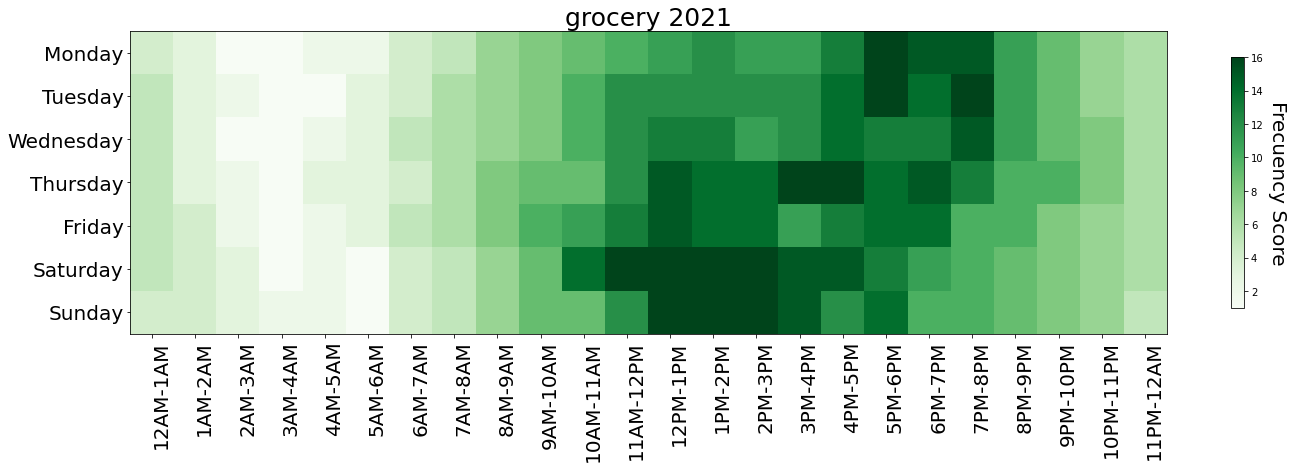

In [18]:
tweet_score = []

m_array = hc_efficiency_score(df5, "Monday", time_frames)
tweet_score.append(m_array)
t_array = hc_efficiency_score(df5, "Tuesday", time_frames)
tweet_score.append(t_array)
w_array = hc_efficiency_score(df5, "Wednesday", time_frames)
tweet_score.append(w_array)
th_array = hc_efficiency_score(df5, "Thursday", time_frames)
tweet_score.append(th_array)
f_array = hc_efficiency_score(df5, "Friday", time_frames)
tweet_score.append(f_array)
st_array = hc_efficiency_score(df5, "Saturday", time_frames)
tweet_score.append(st_array)
s_array = hc_efficiency_score(df5, "Sunday", time_frames)
tweet_score.append(s_array)
print(tweet_score)

fig, ax = plt.subplots(figsize=(20,50))
#(figsize=(width,height))
im = ax.imshow(tweet_score, cmap = cm.Greens)

#get rid of grid lines
ax.grid(False)

#show all ticks...
ax.set_xticks(np.arange(len(time_frames)))
ax.set_yticks(np.arange(len(days_of_week)))
# ... and label them with the respective list entries
ax.set_xticklabels(time_frames, fontsize=20)
ax.set_yticklabels(days_of_week, fontsize=20)

plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

cbarlabel = "Frecuency Score"

cbar = ax.figure.colorbar(im, ax=ax,shrink=0.07)

cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize = 20)

ax.set_title("grocery 2021", fontsize = 25)
fig.tight_layout()
#plt.show()
from PIL import Image
#plt.savefig("time_grid_2019.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

In [11]:
#quantile 
data=[252, 165, 107, 88, 124, 130, 244, 428, 634, 762, 902, 1034, 1169, 1197, 1143, 1155, 1239, 1311, 1299, 1272, 1144, 902, 726, 487,291, 163, 116, 103, 113, 140, 275, 472, 626, 836, 1069, 1209, 1203, 1192, 1196, 1209, 1247, 1351, 1243, 1310, 1147, 922, 698, 500,288, 168, 80, 94, 121, 142, 322, 582, 733, 897, 1071, 1179, 1232, 1229, 1158, 1171, 1257, 1234, 1241, 1267, 1131, 959, 839, 501,294, 155, 123, 101, 134, 169, 276, 510, 788, 911, 975, 1176, 1283, 1261, 1255, 1346, 1305, 1252, 1292, 1236, 1076, 990, 784, 482,310, 180, 122, 95, 127, 156, 322, 539, 770, 993, 1104, 1213, 1265, 1257, 1246, 1168, 1212, 1257, 1242, 1056, 996, 824, 711, 437,332, 190, 135, 110, 120, 113, 201, 396, 724, 971, 1256, 1431, 1416, 1452, 1343, 1302, 1269, 1214, 1134, 1019, 913, 754, 645, 452,276, 173, 134, 119, 127, 112, 181, 355, 666, 916, 989, 1201, 1350, 1359, 1308, 1282, 1187, 1242, 1072, 1033, 906, 811, 630, 417]
quartile_1 = np.quantile(data, 0.0625)
quartile_2 = np.quantile(data, 0.125)
quartile_3 = np.quantile(data, 0.1875)
quartile_4 = np.quantile(data, 0.25)
quartile_5 = np.quantile(data, 0.3125)
quartile_6 = np.quantile(data, 0.375)
quartile_7 = np.quantile(data, 0.4325)
quartile_8 = np.quantile(data, 0.5)
quartile_9 = np.quantile(data, 0.5625)
quartile_10 = np.quantile(data, 0.625)
quartile_11 = np.quantile(data, 0.6875)
quartile_12 = np.quantile(data, 0.75)
quartile_13 = np.quantile(data, 0.8125)
quartile_14 = np.quantile(data, 0.875)
quartile_15 = np.quantile(data, 0.9325)
quartile_16 = np.quantile(data, 1)

 
print(quartile_1,
      quartile_2,
      quartile_3,
      quartile_4,
      quartile_5,
      quartile_6,
      quartile_7,
      quartile_8)

114.3125 133.5 170.25 285.0 429.6875 609.5 737.7775000000001 902.0


In [19]:
fig.savefig("time_grid_grocerry_2021.jpg",dpi=1000,pad_inches=0,bbox_inches="tight")

### How many tweets in each timeframe

In [ ]:
tweet_count = []

def tweets(df, day, times):
    array1 = []
    for time in times:
        m1 = df.loc[(df["weekdays"]== day) & (df["time_groups"]== time),
                 ["weekdays","time_groups"]]
        instance_val = m1["time_groups"].count()
        array1.append(instance_val)
    return array1

m_count = tweets(df5, "Monday", time_frames)
print("Monday: ", m_count)
tweet_count.append(m_count)
t_count = tweets(df5, "Tuesday", time_frames)
tweet_count.append(t_count)
print("Tuesday: ", t_count)
w_count = tweets(df5, "Wednesday", time_frames)
tweet_count.append(w_count)
print("Wednesday: ", w_count)
th_count = tweets(df5, "Thursday", time_frames)
tweet_count.append(th_count)
print("Thursday: ", th_count)
f_count = tweets(df5, "Friday", time_frames)
tweet_count.append(f_count)
print("Friday: ", f_count)
st_count = tweets(df5, "Saturday", time_frames)
tweet_count.append(st_count)
print("Saturday: ", st_count)
s_count = tweets(df5, "Sunday", time_frames)
tweet_count.append(s_count)
print("Sunday: ", s_count)